In [1]:
pip install control

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import control
import matplotlib.pyplot as plt

In [3]:
# Define transfer function of the system
s = control.tf('s')

## Process

In [4]:
Kp = 26.431820859167672
Tau = 984.0594888279699
sys  = Kp/(Tau*s + 1)
sys

TransferFunction(array([26.43182086]), array([984.05948883,   1.        ]))

## Second Order Pade Approximation / Dead Time

In [5]:
Delay = 99.29375000395189
num, den = control.pade(Delay, n=1, numdeg=0)
Pade = control.tf(num, den)
Pade

TransferFunction(array([0.01007113]), array([1.        , 0.01007113]))

## FOPDT

In [6]:
FOPDT = control.series(sys, Pade)
FOPDT

TransferFunction(array([0.26619823]), array([9.84059489e+02, 1.09105884e+01, 1.00711273e-02]))

In [7]:
# Simulate step response
t, y = control.step_response(FOPDT)

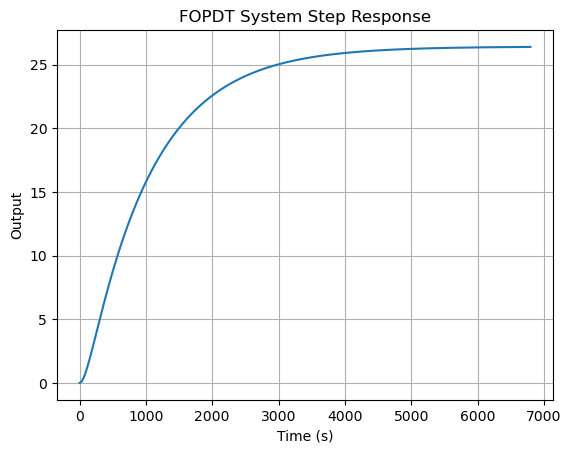

In [8]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('FOPDT System Step Response')
plt.grid()
plt.show()

## ZIEGLER e NICHOLS - Método 1

Somente para resposta em malha aberta no formado Sigmoidal

### Cálculo do Fator de Incontrolabilidade 0.1<=Fi<=0.3 (Alguns autores aceitam até 1.4)

In [9]:
Fi = Delay/Tau
Fi

0.1009021823692918

## P Controller

In [10]:
Kc = Tau/(Kp*Delay)
Kc

0.37494913692852744

In [11]:
# Define transfer function of the P Controller
Controller = Kc

### Open Loop

In [12]:
Sys_Control = control.series(Controller, FOPDT)

### Closed Loop

In [13]:
# Create closed-loop system
cl_sys = control.feedback(Sys_Control, 1, sign=-1)

In [14]:
# Simulate step response
t, y = control.step_response(cl_sys)

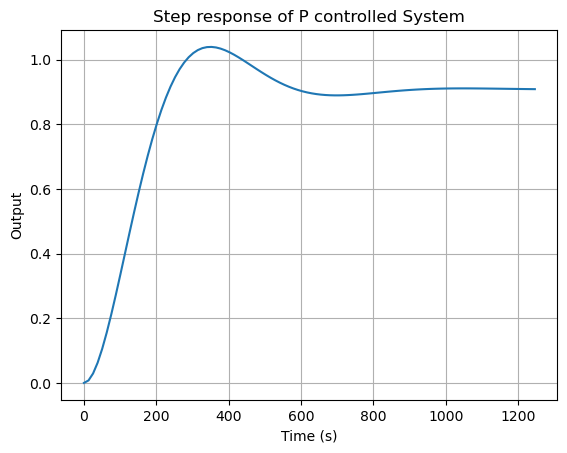

In [15]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step response of P controlled System')
plt.grid()
plt.show()

## PI Controller

In [16]:
Kc = (0.9*Tau)/(Kp*Delay)
Kc

0.3374542232356747

In [17]:
ti= Delay/0.3
ti

330.97916667983964

In [18]:
# Define transfer function of the PID Controller
Controller = Kc*(1 + (1/(ti*s)))

### Open Loop

In [19]:
Sys_Control = control.series(Controller, FOPDT)

### Closed Loop

In [20]:
# Create closed-loop system
cl_sys = control.feedback(Sys_Control, 1, sign=-1)

In [21]:
# Simulate step response
t, y = control.step_response(cl_sys)

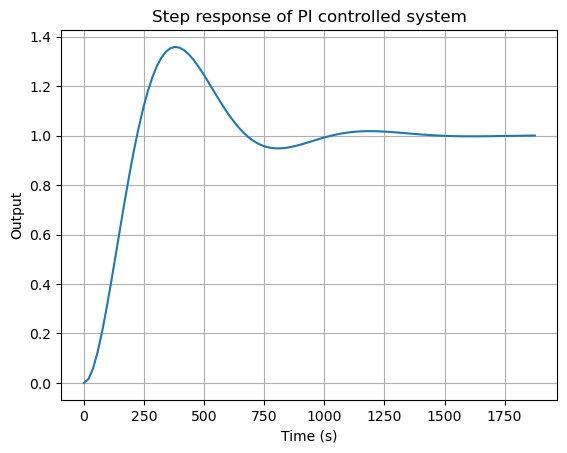

In [22]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step response of PI controlled system')
plt.grid()
plt.show()

## PID Controller

In [23]:
Kc = (1.2*Tau)/(Kp*Delay)

In [24]:
ti= 2*Delay

In [25]:
td = 0.5*Delay

In [26]:
print("Kc = {:.2f}".format(Kc))
print("ti = {:.2f}s".format(ti))
print("td = {:.2f}s".format(td))

Kc = 0.45
ti = 198.59s
td = 49.65s


In [27]:
# Define transfer function of the PID Controller
Controller = Kc*(1 + (1/(ti*s)) + (td*s))

### Open Loop

In [28]:
Sys_Control = control.series(Controller, FOPDT)

### Closed Loop

In [29]:
# Create closed-loop system
cl_sys = control.feedback(Sys_Control, 1, sign=-1)

In [30]:
# Simulate step response
t, y = control.step_response(cl_sys)

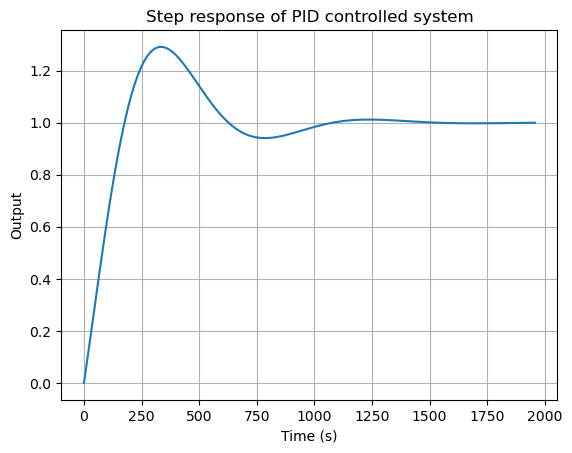

In [31]:
# Plot step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Step response of PID controlled system')
plt.grid()
plt.show()